## Assignment 13
### ACD MDS March 2018 batch - Student: K. Anandaranga

In [1]:
#Read the following data set:
#https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

#Rename the columns as per the description from this file:
#https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names


In [2]:
#Task:
#Create a sql db from adult dataset and name it sqladb
#1. Select 10 records from the adult sqladb
#2. Show me the average hours per week of all men who are working in private sector
#3. Show me the frequency table for education, occupation and relationship, separately
#4. Are there any people who are married, working in private sector and having a masters degree
#5. What is the average, minimum and maximum age group for people working in different sectors
#6. Calculate age distribution by country
# 7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capital-gain' and 'capital-loss'

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Above_Below_50K_year']

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Above_Below_50K_year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Above_Below_50K_year'],
      dtype='object')

In [7]:
import sqlite3 as db
from pandasql import sqldf
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [8]:
df.to_sql ('sqladb', con=engine , if_exists="replace")

In [9]:
#1. Select 10 records from the adult sqladb

engine.execute("SELECT * FROM sqladb LIMIT 10").fetchall()

[(0, 39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40, ' United-States', ' <=50K'),
 (1, 50, ' Self-emp-not-inc', 83311, ' Bachelors', 13, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', 0, 0, 13, ' United-States', ' <=50K'),
 (2, 38, ' Private', 215646, ' HS-grad', 9, ' Divorced', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K'),
 (3, 53, ' Private', 234721, ' 11th', 7, ' Married-civ-spouse', ' Handlers-cleaners', ' Husband', ' Black', ' Male', 0, 0, 40, ' United-States', ' <=50K'),
 (4, 28, ' Private', 338409, ' Bachelors', 13, ' Married-civ-spouse', ' Prof-specialty', ' Wife', ' Black', ' Female', 0, 0, 40, ' Cuba', ' <=50K'),
 (5, 37, ' Private', 284582, ' Masters', 14, ' Married-civ-spouse', ' Exec-managerial', ' Wife', ' White', ' Female', 0, 0, 40, ' United-States', ' <=50K'),
 (6, 49, ' Private', 160187, ' 9th', 5, ' Married-spo

In [10]:
#2. Show me the average hours per week of all men who are working in private sector

engine.execute("SELECT AVG([hours-per-week]) as Avg_hrs_per_week FROM sqladb where ([sex] = ' Male' and [workclass] = ' Private' )").fetchall()

[(42.22122591006424,)]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#3. Show the frequency table for education, occupation and relationship, separately

out3_1 = engine.execute("SELECT [education], count(*) as cnt FROM sqladb GROUP BY [education] order  by cnt DESC").fetchall()
#out

df3_1 = pd.DataFrame.from_dict(out3_1)
df3_1.columns = ("education", "count")
df3_1

,education,count
0,HS-grad,10501
1,Some-college,7291
2,Bachelors,5355
3,Masters,1723
4,Assoc-voc,1382
5,11th,1175
6,Assoc-acdm,1067
7,10th,933
8,7th-8th,646
9,Prof-school,576


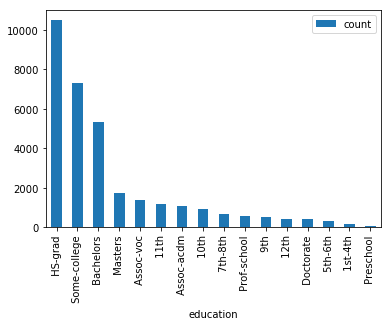

In [13]:
# plotting the frequency table
df3_1.set_index("education",drop=True,inplace=True)
df3_1.plot.bar()
plt.show()

In [14]:
# Repeat this for occuption
out3_2 = engine.execute("SELECT [occupation], count(*) as cnt FROM sqladb GROUP BY [occupation] ORDER BY cnt DESC ").fetchall()
out3_2

df3_2 = pd.DataFrame.from_dict(out3_2)
df3_2.columns = ("occupation", "count")
df3_2

,occupation,count
0,Prof-specialty,4140
1,Craft-repair,4099
2,Exec-managerial,4066
3,Adm-clerical,3770
4,Sales,3650
5,Other-service,3295
6,Machine-op-inspct,2002
7,?,1843
8,Transport-moving,1597
9,Handlers-cleaners,1370


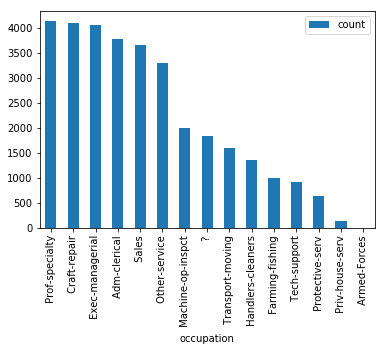

In [15]:
# plotting the frequency table
df3_2.set_index("occupation",drop=True,inplace=True)
df3_2.plot.bar()
plt.show()

In [16]:
# Repeat this for relationship
out3_3 = engine.execute("SELECT [relationship], count(*) as cnt FROM sqladb GROUP BY [relationship] ORDER BY cnt DESC ").fetchall()
out3_3

df3_3 = pd.DataFrame.from_dict(out3_3)
df3_3.columns = ("relationship", "count")
df3_3

,relationship,count
0,Husband,13193
1,Not-in-family,8305
2,Own-child,5068
3,Unmarried,3446
4,Wife,1568
5,Other-relative,981


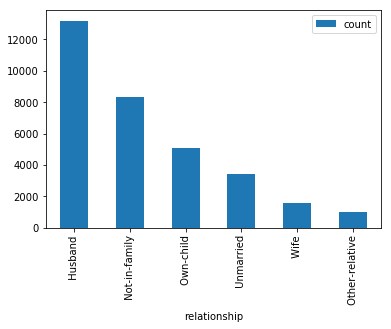

In [17]:
# plotting the frequency table
df3_3.set_index("relationship",drop=True,inplace=True)
df3_3.plot.bar()
plt.show()

In [18]:
#4. Are there any people who are married, working in private sector and having a masters degree

o3 = engine.execute("SELECT count(*) FROM sqladb WHERE ([workclass] IN (' Private' ) AND ([marital-status] IN (' Married-civ-spouse',' Married-spouse-absent', ' Married-AF-spouse' )AND ([education] IN (' Masters',' Doctorate' )) )) ").fetchall()

print ("Yes, there are %d number of records in this category" %(o3[0][0]))

Yes, there are 669 number of records in this category


In [19]:
#5. What is the average, minimum and maximum age group for people working in different sectors

o5 = engine.execute("SELECT avg([age]), min([age]), max([age]), [occupation] FROM sqladb GROUP BY [occupation] ").fetchall()
o5

df5 = pd.DataFrame.from_dict(o5)
df5.columns = ("Avg_age", "Min_age", "Max_age", "occupation")
df5

,Avg_age,Min_age,Max_age,occupation
0,40.882800,17,90,?
1,36.964456,17,90,Adm-clerical
2,30.222222,23,46,Armed-Forces
3,39.031471,17,90,Craft-repair
4,42.169208,17,90,Exec-managerial
5,41.211268,17,90,Farming-fishing
6,32.165693,17,90,Handlers-cleaners
7,37.715285,17,90,Machine-op-inspct
8,34.949621,17,90,Other-service
9,41.724832,17,81,Priv-house-serv


In [20]:
#6. Calculate age distribution by country

o6 = engine.execute("SELECT [native-country], min([age]), avg([age]), max([age]), (max([age])-min([age])) as range FROM sqladb GROUP BY [native-country] ORDER BY range DESC ").fetchall()
o6

df6 = pd.DataFrame.from_dict(o6)
df6.columns = ("Country, ", "Avg age", "Min age", "Max age", "Range")
df6

,"Country,",Avg age,Min age,Max age,Range
0,?,17,38.725557,90,73
1,England,17,41.155556,90,73
2,Philippines,17,39.444444,90,73
3,Puerto-Rico,17,40.508772,90,73
4,United-States,17,38.655674,90,73
5,South,19,38.750000,90,71
6,Ecuador,21,36.642857,90,69
7,Poland,17,43.116667,85,68
8,Mexico,17,33.290824,81,64
9,Canada,17,42.545455,80,63


In [21]:
# 7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capital-gain' and 'capital-loss'

#engine.execute ("ALTER TABLE sqladb DROP COLUMN [Net_Capital_Gain]").fetchall()

engine.execute ("ALTER TABLE sqladb ADD COLUMN NetCapitalGain integer")
engine.execute ("UPDATE sqladb SET NetCapitalGain = ([capital-gain] - [capital-loss])")
#engine.commit

o7 = engine.execute("SELECT * FROM sqladb LIMIT 10").fetchall()
df7 = pd.DataFrame.from_dict(o7)
df7.columns = ['Seq', 'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Above_Below_50K_year','Net_Capital_Gain']
df7

,Seq,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Above_Below_50K_year,Net_Capital_Gain
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,14084
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,5178
